<a href="https://colab.research.google.com/github/irenedini/learning-fastai/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision import *

In [ ]:
mnist_path = untar_data(URLs.MNIST)

In [ ]:
mnist_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label
    )

In [ ]:
mnist_dls = mnist_db.dataloaders(mnist_path)

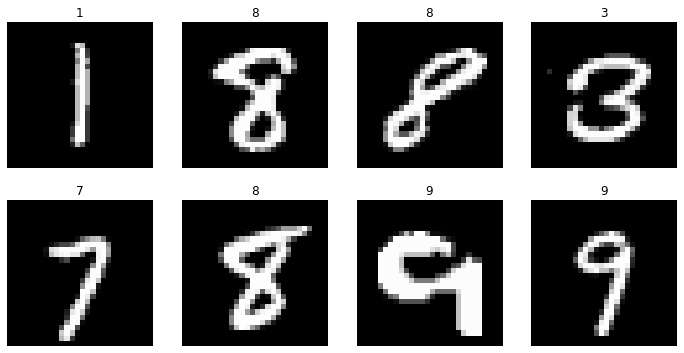

In [ ]:
mnist_dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learn = cnn_learner(mnist_dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.708580,0.496005,0.843929,01:41


epoch,train_loss,valid_loss,accuracy,time
0,0.126401,0.080955,0.976286,01:50
1,0.075516,0.055299,0.984571,01:50
2,0.043525,0.038953,0.988071,01:49
3,0.022066,0.034336,0.990357,01:51


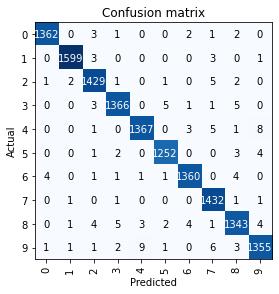

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

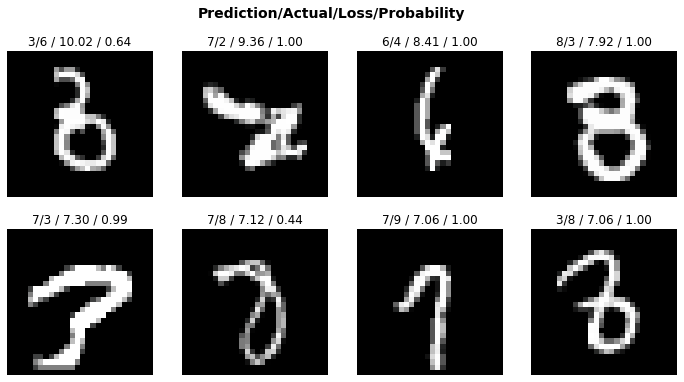

In [ ]:
interp.plot_top_losses(8, nrows=2)